# Transfer learning Fine-Tuning Exercise

Link -> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-05-transfer-learning-in-tensorflow-part-2-fine-tuning-exercises

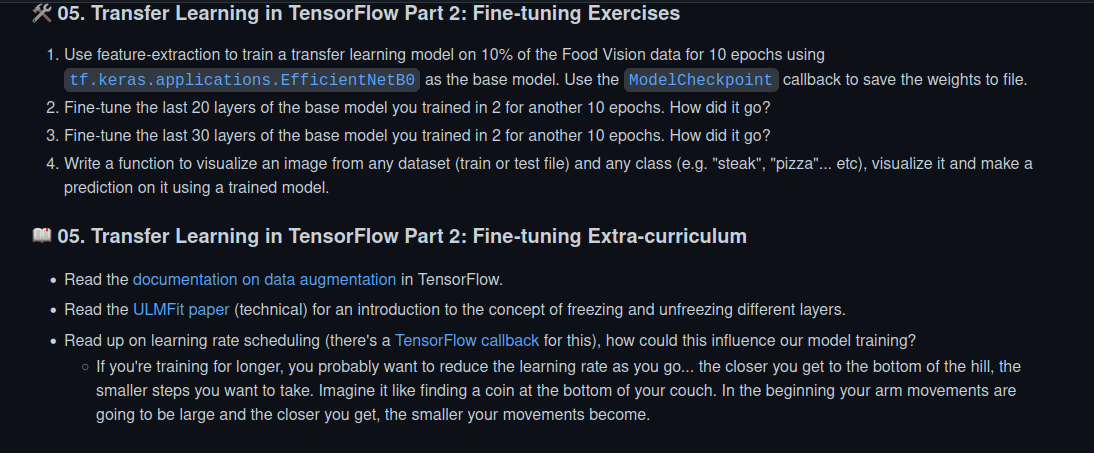

In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB0


#### Importing helper function

In [70]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-31 12:58:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-31 12:58:54 (55.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [71]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

## Experiment 1: Feature Extraction with 10% of the dataset

> We will be creating a model with 10% of the data with feature excration. 

## Getting the data

In [72]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-31 12:58:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   288MB/s    in 0.6s    

2022-07-31 12:58:55 (288 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [73]:
unzip_data('10_food_classes_10_percent.zip')

In [74]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent

### Creating paths

In [75]:
train_dir_10_percent= '10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [76]:
IMG_SIZE=(512,512)
BATCH_SIZE=32

train_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,image_size= IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [77]:
class_count= len(train_data_10_percent.class_names)
class_count

10

### Data Augmentation Layer for the model

In [78]:
data_augmentation= keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

### ModelCheckpoint Callback

In [79]:
checkpoint_path='ten_percent_model_checkpoints_weights/checkpoint.ckpt'

checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, save_freq="epoch", verbose=1)

## Building a model with feature extraction

In [80]:
# input_shape=(512,512,3)

# base_model= EfficientNetB0(include_top=False)
# base_model.trainable= False

# inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

# x= data_augmentation(inputs)

# x= base_model(x, training=False)

# x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# outputs= layers.Dense(class_count, activation="relu", name="output_layer")(x)

# model_0= keras.Model(inputs, outputs)

# model_0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

# history_0_10_percent= model_0.fit(train_data_10_percent, epochs=10, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction"), checkpoint_callback])


In [81]:
# model_0.evaluate(test_data)

In [82]:
# model_0_512_size=model_0.evaluate(test_data)
# model_0_512_size

In [83]:
# plot_loss_curves(history_0_10_percent)

In [84]:
# IMG_SIZE=(224,224)
# BATCH_SIZE=32

# train_data_10_percent_224= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,image_size= IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")
# test_data_224= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")

In [85]:
# input_shape=(224,224,3)

# base_model= EfficientNetB0(include_top=False)
# base_model.trainable= False

# inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

# x= data_augmentation(inputs)

# x= base_model(x, training=False)

# x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

# outputs= layers.Dense(class_count, activation="relu", name="output_layer")(x)

# model_0_224= keras.Model(inputs, outputs)

# model_0_224.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

# history_0_10_percent_224= model_0_224.fit(train_data_10_percent_224, epochs=10, steps_per_epoch=len(train_data_10_percent_224), validation_data=test_data_224, validation_steps=len(test_data_224), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction_224"), checkpoint_callback])


In [86]:
# model_0_224.evaluate(test_data_224)

In [87]:
# model_0_224_size=model_0_224.evaluate(test_data_224)
# model_0_224_size

## Conclusion

> The `IMG_SIZE` of the input images matter, as it can have a decently huge impact on the accuracy of the model. When I trained a model on `(512,512,3)` sized images, it gave an accuracy of ~ 55.2%. When I trained a model on `(224,224,3)` sized images, it gave an accuracy of ~ 72.4%, which is like ~ 20% more accuracy.

## Building a model with feature extraction with (224,224,3) sized images

In [88]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,image_size= IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [89]:
input_shape=(224,224,3)

base_model= EfficientNetB0(include_top=False)
base_model.trainable= False

inputs= tf.keras.layers.Input(shape=input_shape, name="input_layer")

x= data_augmentation(inputs)

x= base_model(x, training=False)

x= layers.GlobalAveragePooling2D(name="global_average_pooling2D")(x)

outputs= layers.Dense(class_count, activation="relu", name="output_layer")(x)

model_0= keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

history_0_10_percent= model_0.fit(train_data_10_percent, 
                                  epochs=10, steps_per_epoch=len(train_data_10_percent), 
                                  validation_data=test_data, validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_augmented_feature_extraction"), checkpoint_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented_feature_extraction/20220731-125900
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 5.4036 - accuracy: 0.2707
Epoch 1: val_loss improved from inf to 2.39520, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 490ms/step - loss: 5.4036 - accuracy: 0.2707 - val_loss: 2.3952 - val_accuracy: 0.4872
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 2.3426 - accuracy: 0.5067
Epoch 2: val_loss improved from 2.39520 to 1.58369, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 417ms/step - loss: 2.3426 - accuracy: 0.5067 - val_loss: 1.5837 - val_accuracy: 0.6088
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.8111 - accuracy: 0.5973
Epoch 3: val_loss improved from 1.58369 to 1.48361, saving model to ten_percent_model_checkpoints_weig

In [90]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: nan - accuracy: 0.7516


[nan, 0.7516000270843506]

In [91]:
model_0_result= model_0.evaluate(test_data)
model_0_result

79/79 [==============================] - 6s 72ms/step - loss: nan - accuracy: 0.7516


[nan, 0.7516000270843506]

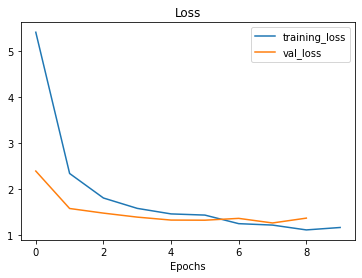

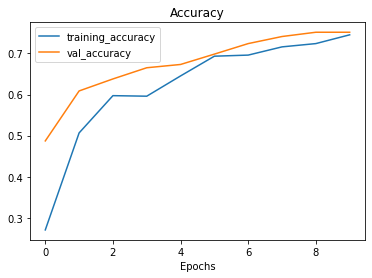

In [92]:
plot_loss_curves(history_0_10_percent)

In [93]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2D (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

## Fine-Tune `model_0` with 20 unforzen layers

In [94]:
model_0.layers

In [95]:
for layer in model_0.layers:
  print(layer, layer.name, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5e9c7d5f10> input_layer True
<keras.engine.sequential.Sequential object at 0x7f5e9c428750> data_augmentation_layer True
<keras.engine.functional.Functional object at 0x7f5e3bd99c10> efficientnetb0 False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f5e9c2c9d50> global_average_pooling2D True
<keras.layers.core.dense.Dense object at 0x7f5f59fc15d0> output_layer True


In [96]:
for layer in base_model.layers:
  print(layer, layer.name, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5e9c2c9e10> input_2 False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f5e9c2ec3d0> rescaling_1 False
<keras.layers.preprocessing.normalization.Normalization object at 0x7f5e9c3d9290> normalization_1 False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5e9c252450> stem_conv_pad False
<keras.layers.convolutional.Conv2D object at 0x7f5e9c252190> stem_conv False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5e9c25c350> stem_bn False
<keras.layers.core.activation.Activation object at 0x7f5f40675a10> stem_activation False
<keras.layers.convolutional.DepthwiseConv2D object at 0x7f5e9c264310> block1a_dwconv False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5e9c25cfd0> block1a_bn False
<keras.layers.core.activation.Activation object at 0x7f5e9c26ba90> block1a_activation False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f5f57

In [97]:
len(base_model.layers)

237

In [98]:
len(base_model.layers[:-20])

217

In [99]:
base_model.trainable= True

for layer in base_model.layers[:-20]:
  layer.trainable=False

model_0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [100]:
for layer in base_model.layers:
  if layer.trainable == True:
    print(layer, layer.name, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f5e3bda63d0> block6d_project_conv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5e3bda6610> block6d_project_bn True
<keras.layers.core.dropout.Dropout object at 0x7f5e3bdbf9d0> block6d_drop True
<keras.layers.merge.Add object at 0x7f5e3bdce3d0> block6d_add True
<keras.layers.convolutional.Conv2D object at 0x7f5e3bdca090> block7a_expand_conv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5e3bdb6890> block7a_expand_bn True
<keras.layers.core.activation.Activation object at 0x7f5e3bdce950> block7a_expand_activation True
<keras.layers.convolutional.DepthwiseConv2D object at 0x7f5e3bddb310> block7a_dwconv True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5e3be6ca50> block7a_bn True
<keras.layers.core.activation.Activation object at 0x7f5e3bddb390> block7a_activation True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f5

In [101]:
len(model_0.trainable_variables)

21

### Fine-Tuning for another 10 epochs

In [102]:
initial_epochs=10

In [103]:
fine_tune_epochs= initial_epochs + 10

history_2_unfrozen_20= model_0.fit(train_data_10_percent, epochs=fine_tune_epochs, initial_epoch=history_0_10_percent.epoch[-1], steps_per_epoch=len(train_data_10_percent), validation_steps= len(test_data), validation_data= test_data, callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_fine_tune_last_20_layers")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_20_layers/20220731-130141
Epoch 10/20
24/24 [==============================] - 22s 671ms/step - loss: nan - accuracy: 0.7573 - val_loss: nan - val_accuracy: 0.7640
Epoch 11/20
24/24 [==============================] - 10s 422ms/step - loss: nan - accuracy: 0.7747 - val_loss: nan - val_accuracy: 0.7660
Epoch 12/20
24/24 [==============================] - 10s 404ms/step - loss: nan - accuracy: 0.8107 - val_loss: nan - val_accuracy: 0.7664
Epoch 13/20
24/24 [==============================] - 10s 417ms/step - loss: nan - accuracy: 0.7987 - val_loss: nan - val_accuracy: 0.7972
Epoch 14/20
24/24 [==============================] - 10s 420ms/step - loss: nan - accuracy: 0.8053 - val_loss: nan - val_accuracy: 0.7912
Epoch 15/20
24/24 [==============================] - 10s 416ms/step - loss: nan - accuracy: 0.8307 - val_loss: nan - val_accuracy: 0.7828
Epoch 16/20
24/24 [==============================] - 10s 404ms/step -

In [104]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: nan - accuracy: 0.6904


[nan, 0.6904000043869019]

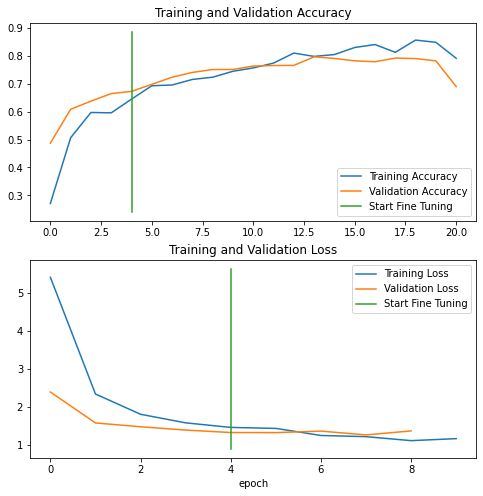

In [105]:
compare_historys(history_0_10_percent, history_2_unfrozen_20)

In [106]:
model_1_20_layers_unfrozen= model_0.evaluate(test_data)
model_1_20_layers_unfrozen

79/79 [==============================] - 6s 72ms/step - loss: nan - accuracy: 0.6904


[nan, 0.6904000043869019]

## Fine-Tune `model_0` with 30 unforzen layers

### Reverting `model_0` back to feature_extraction

> So, that we can reset the model back to the feature_extraction state and forget the learning from the fine-tuning of `20` unfrozen layers. 

> It is also easier to compare between the `20` and `30` unfrozen layer accuracy score.

In [107]:
model_0.load_weights(checkpoint_path)

In [108]:
model_0_result

[nan, 0.7516000270843506]

In [109]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.2699 - accuracy: 0.7412


[1.2699347734451294, 0.7411999702453613]

In [110]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [111]:
base_model.trainable= True

for layer in base_model.layers[:-30]:
  layer.trainable=False

model_0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [112]:
for layer_number, layer in enumerate(base_model.layers):
  if layer.trainable == True:
    print(layer_number, layer.name, layer.trainable)

207 block6d_expand_bn True
208 block6d_expand_activation True
209 block6d_dwconv True
210 block6d_bn True
211 block6d_activation True
212 block6d_se_squeeze True
213 block6d_se_reshape True
214 block6d_se_reduce True
215 block6d_se_expand True
216 block6d_se_excite True
217 block6d_project_conv True
218 block6d_project_bn True
219 block6d_drop True
220 block6d_add True
221 block7a_expand_conv True
222 block7a_expand_bn True
223 block7a_expand_activation True
224 block7a_dwconv True
225 block7a_bn True
226 block7a_activation True
227 block7a_se_squeeze True
228 block7a_se_reshape True
229 block7a_se_reduce True
230 block7a_se_expand True
231 block7a_se_excite True
232 block7a_project_conv True
233 block7a_project_bn True
234 top_conv True
235 top_bn True
236 top_activation True


In [113]:
len(model_0.trainable_variables)

30

In [114]:
len(base_model.trainable_variables)

28

In [115]:
initial_epochs

10

In [116]:
fine_tune_epochs = initial_epochs + 10

history_3_30_unfrozen= model_0.fit(train_data_10_percent, epochs=fine_tune_epochs, steps_per_epoch=len(train_data_10_percent), initial_epoch=history_0_10_percent.epoch[-1], validation_data=test_data, validation_steps= len(test_data), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_fine_tune_last_30_layers")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_30_layers/20220731-130435
Epoch 10/20
24/24 [==============================] - 18s 478ms/step - loss: nan - accuracy: 0.7440 - val_loss: nan - val_accuracy: 0.7508
Epoch 11/20
24/24 [==============================] - 10s 403ms/step - loss: nan - accuracy: 0.7720 - val_loss: nan - val_accuracy: 0.7672
Epoch 12/20
24/24 [==============================] - 9s 386ms/step - loss: nan - accuracy: 0.7973 - val_loss: nan - val_accuracy: 0.7788
Epoch 13/20
24/24 [==============================] - 10s 416ms/step - loss: nan - accuracy: 0.8213 - val_loss: nan - val_accuracy: 0.7792
Epoch 14/20
24/24 [==============================] - 10s 423ms/step - loss: nan - accuracy: 0.8080 - val_loss: nan - val_accuracy: 0.7572
Epoch 15/20
24/24 [==============================] - 9s 384ms/step - loss: nan - accuracy: 0.8040 - val_loss: nan - val_accuracy: 0.7824
Epoch 16/20
24/24 [==============================] - 10s 389ms/step - l

In [117]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: nan - accuracy: 0.7304


[nan, 0.730400025844574]

In [118]:
model_2_30_layers_unfrozen=model_0.evaluate(test_data)
model_2_30_layers_unfrozen

79/79 [==============================] - 6s 71ms/step - loss: nan - accuracy: 0.7304


[nan, 0.730400025844574]

In [119]:
model_1_20_layers_unfrozen

[nan, 0.6904000043869019]

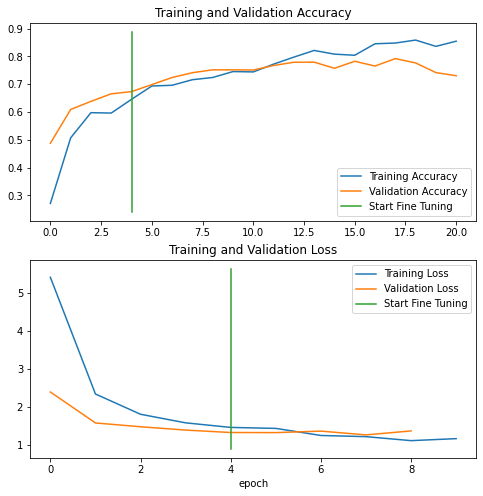

In [120]:
compare_historys(history_0_10_percent, history_3_30_unfrozen)

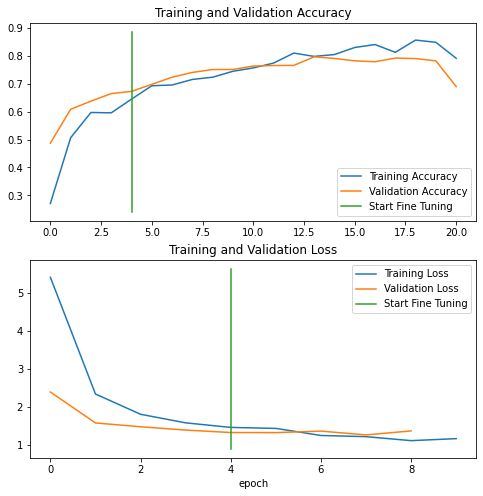

In [121]:
compare_historys(history_0_10_percent, history_2_unfrozen_20)

## Conclusion

> The model with `30` unfrozen layers is doing better as the `training and validation` accuracy graphs will be going up if we would train for longer.

> The model with `20` unfrozen layers is doing good but not as good as the `30` unforzen layer model as the `training and validation` accuracy graphs will be going up if we would train for longer.

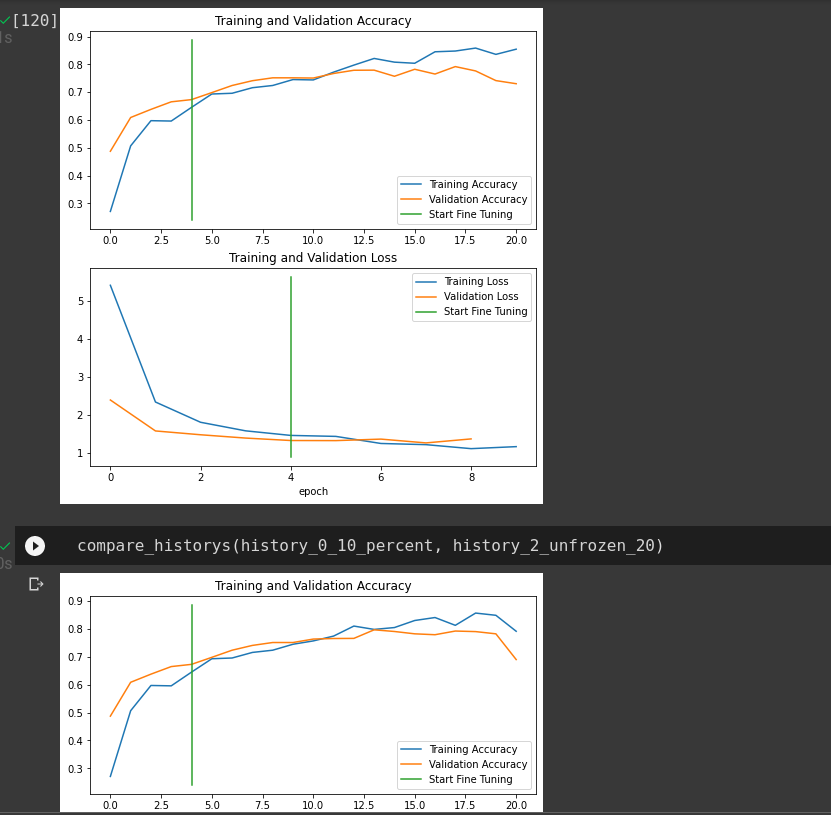

In [ ]:
compare_historys(history_3_30_unfrozen, history_2_unfrozen_20)

## Tensorboard visualization

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
--name "Transfer Learning experiments With Fine-Tuning with 20 and 30 unfrozen layers" \
--description "A series of transfer learning experiments using feature extraction as well as fine tuning" \
--one_shot

### Tensorboard Link

Link -> https://tensorboard.dev/experiment/zUzSKM2yQcqSg1nSA0PGuQ/